In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

(-4.2040316877451032,
 3.5836787275996005,
 -2.5819819530784365,
 2.4002481531304349)

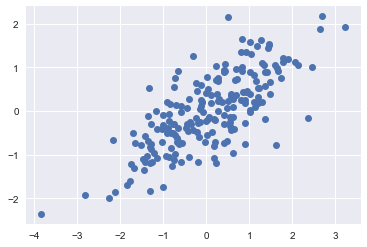

In [2]:
x = np.dot(np.random.random(size=(2,2)), np.random.normal(size=(2,200))).T

plt.plot(x[:,0], x[:,1],"o")
plt.axis()

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

print(pca.explained_variance_)
print(pca.components_)


[ 1.74581445  0.2366778 ]
[[-0.81446189 -0.58021705]
 [ 0.58021705 -0.81446189]]


(-4.2040316877451032,
 3.5836787275996005,
 -2.5819819530784365,
 2.4002481531304349)

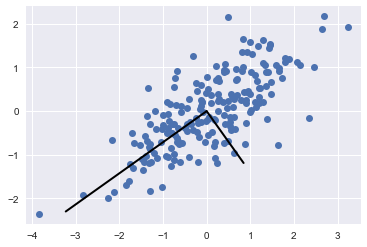

In [4]:
plt.plot(x[:,0], x[:,1], "o")

for length, value in zip(pca.explained_variance_, pca.components_):
    v = value * 3* np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]],c= "k", lw=2)
plt.axis("equal")

In [5]:
model = PCA(.95)
x_trans = model.fit_transform(x)
print(x_trans.shape)
print(x.shape)

(200, 2)
(200, 2)


Text(0,0.5,'bebek')

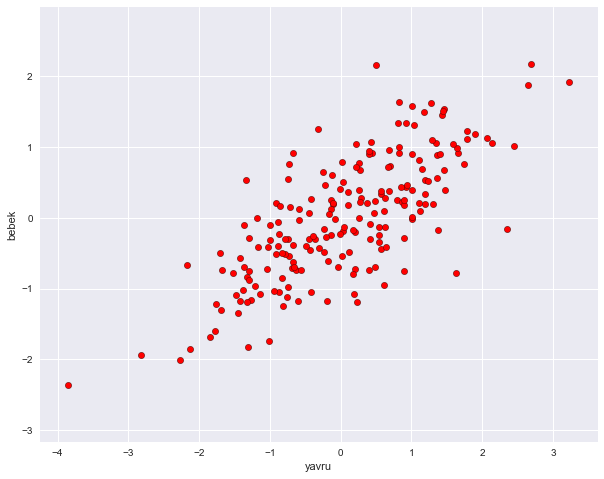

In [6]:
X_new = model.inverse_transform(x_trans)
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1],alpha=.6,s=30, edgecolors="k", lw=.3,c="g")
plt.scatter(X_new[:,0], X_new[:,1], edgecolors="k", s=40,lw=.3,c="r")
plt.axis("equal")
plt.xlabel("yavru")
plt.ylabel("bebek")

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

In [8]:
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [9]:
pca = PCA(2)
x_trans = pca.fit_transform(x)
print(x.shape)
print(x_trans.shape)

(1797, 64)
(1797, 2)


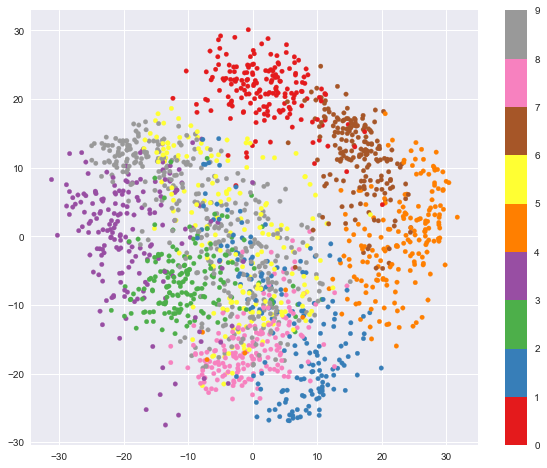

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x_trans[:,0], x_trans[:,1], c=y, cmap="Set1",s=20)
plt.colorbar()

(0, 2)

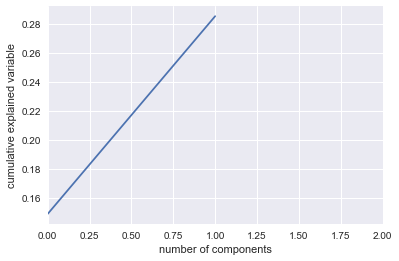

In [11]:
pca1 = PCA(n_components=2).fit(x)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variable")
plt.xlim((0,2))

In [12]:
pca = PCA(2).fit(x)
x_trans = pca.transform(x[20:21])
x[20:21]

array([[  0.,   0.,   3.,  13.,  11.,   7.,   0.,   0.,   0.,   0.,  11.,
         16.,  16.,  16.,   2.,   0.,   0.,   4.,  16.,   9.,   1.,  14.,
          2.,   0.,   0.,   4.,  16.,   0.,   0.,  16.,   2.,   0.,   0.,
          0.,  16.,   1.,   0.,  12.,   8.,   0.,   0.,   0.,  15.,   9.,
          0.,  13.,   6.,   0.,   0.,   0.,   9.,  14.,   9.,  14.,   1.,
          0.,   0.,   0.,   2.,  12.,  13.,   4.,   0.,   0.]])

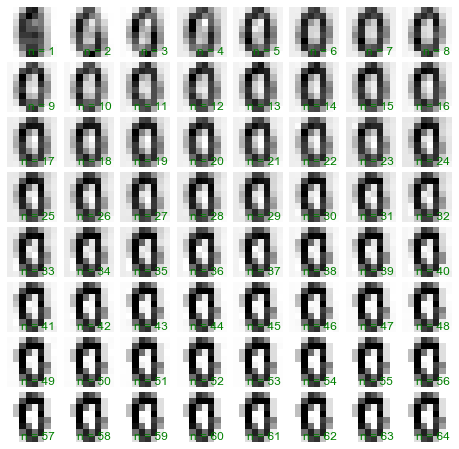

In [13]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(x)
    im = pca.inverse_transform(pca.transform(x[[20]]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])